## "Prime Analytics: Unveiling Amazon's Content Success"
The Amazon Prime TV Shows and Movies dataset from Kaggle consists of two files: "credits.csv" and "titles.csv". The dataset contains information about more than 9,000 unique titles available on Amazon Prime.

The "titles.csv" file includes the following columns:

- "id": The title ID on JustWatch.
- "title": The name of the title.
- "show_type": Indicates whether it is a TV show or a movie.
- "description": A brief description of the title.
- "release_year": The year of release.
- "age_certification": The age certification for the title.
- "runtime": The length of the episode (for TV shows) or movie.
- "genres": A list of genres associated with the title.
- "production_countries": A list of countries that produced the title.
- "seasons": Number of seasons (if it's a TV show).
- "imdb_id": The title ID on IMDB.
- "imdb_score": The score/rating on IMDB.
- "imdb_votes": The number of votes/ratings on IMDB.
- "tmdb_popularity": The popularity rating on TMDB.
- "tmdb_score": The score/rating on TMDB.

The "credits.csv" file contains information about the cast and crew of the titles. It includes the following columns:

- "person_ID": The person ID on JustWatch.
- "id": The title ID on JustWatch.
- "name": The name of the actor or director.
- "character_name": The character name (for actors).
- "role": Indicates whether the person is an ACTOR or DIRECTOR.

With this dataset, we can explore various aspects of the titles available on Amazon Prime, such as content distribution, their release year, genre distribution, popularity, and ratings on platforms like IMDB and TMDB. Additionally, the credits information allows us to analyze the involvement of actors and directors in the titles.


In [27]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load in file
# Store filepath in a variable
titles_data_csv = Path("Resources/titles.csv")
credits_data_csv = Path("Resources/credits.csv")

# Read titles and credits data file and store into Pandas DataFrames
titles_data_df = pd.read_csv(titles_data_csv)
credits_data_df = pd.read_csv(credits_data_csv)

## Cleaning the datasets

In [28]:
credits_data_df

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


In [29]:
credits_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [30]:
#count the number of missing values in each column of credits_data_df
credits_data_df.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [31]:
#replace null values with 'No Data'
credits_data_df["character"].replace(np.nan, "No Data", inplace = True)
credits_data_df

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


In [32]:
titles_data_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [33]:
titles_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [34]:
#count the number of missing values in each column of titles_data_df
titles_data_df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [35]:
# Drop seasons and age_certification columns because they have a lot of  missing values
titles_data_df.drop(["seasons", "age_certification"], axis = 1, inplace = True)

titles_data_df

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,93,['drama'],['US'],tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,55,['comedy'],['US'],tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,116,['crime'],['IN'],NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,72,"['family', 'drama']",[],tt14331982,8.4,49.0,0.645,NaN


In [36]:
titles_data_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
runtime                   int64
genres                   object
production_countries     object
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [37]:
# impute values for the rest of the null columns
titles_data_df["description"].fillna("No Data", inplace=True)
titles_data_df["imdb_id"].fillna("No Data", inplace=True)
titles_data_df["imdb_score"].fillna(titles_data_df["imdb_score"].mean(), inplace=True)
titles_data_df["imdb_votes"].fillna(titles_data_df["imdb_votes"].mean(), inplace=True)
titles_data_df["tmdb_popularity"].fillna(titles_data_df["tmdb_popularity"].mean(), inplace=True)
titles_data_df["tmdb_score"].fillna(titles_data_df["tmdb_score"].mean(), inplace=True)

In [38]:
# Replace empty square brackets [] with "No Data" in the 'production_countries' column

titles_data_df['production_countries'] = titles_data_df['production_countries'].str.replace('\[\]','No Data', regex=True)
titles_data_df

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.600000,1092.000000,15.424000,7.600000
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.200000,89766.000000,8.647000,8.000000
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.100000,63026.000000,8.435000,7.800000
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.800000,57835.000000,11.270000,7.400000
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.900000,30924.000000,8.273000,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,93,['drama'],['US'],tt7672388,5.300000,20.000000,1.406000,5.984247
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,55,['comedy'],['US'],tt15041600,5.976395,8533.614253,0.600000,5.984247
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,116,['crime'],['IN'],No Data,5.976395,8533.614253,1.960000,5.984247
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,72,"['family', 'drama']",No Data,tt14331982,8.400000,49.000000,0.645000,5.984247


In [39]:
merged_movie_data= pd.merge(titles_data_df, credits_data_df, on ="id", how="outer")
merged_movie_data

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.600000,1092.000000,15.424000,7.600000,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.600000,1092.000000,15.424000,7.600000,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.600000,1092.000000,15.424000,7.600000,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.200000,89766.000000,8.647000,8.000000,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.200000,89766.000000,8.647000,8.000000,28713.0,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125349,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,72,"['family', 'drama']",No Data,tt14331982,8.400000,49.000000,0.645000,5.984247,1938565.0,Vijay Thakur,Sanjay Thakur,ACTOR
125350,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,72,"['family', 'drama']",No Data,tt14331982,8.400000,49.000000,0.645000,5.984247,728899.0,Vanya Wellens,Budhiya,ACTOR
125351,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,72,"['family', 'drama']",No Data,tt14331982,8.400000,49.000000,0.645000,5.984247,1938620.0,Vishwa Bhanu,Gissu,ACTOR
125352,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,72,"['family', 'drama']",No Data,tt14331982,8.400000,49.000000,0.645000,5.984247,1938620.0,Vishwa Bhanu,No Data,DIRECTOR


## Analysis of the Data

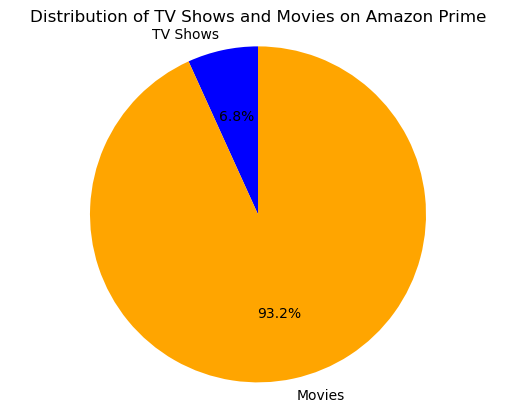

In [40]:
# What is the distribution of TV shows and movies available on Amazon Prime?

# Filter TV shows and movies from the main dataset
tv_shows = merged_movie_data[merged_movie_data['type'] == 'SHOW']
movies = merged_movie_data[merged_movie_data['type'] == 'MOVIE']

# Get the count of TV shows and movies
tv_show_count = len(tv_shows)
movie_count = len(movies)

# Create labels and sizes for the pie chart
labels = ['TV Shows', 'Movies']
sizes = [tv_show_count, movie_count]

# Create color palette for the pie chart
colors = ["blue", "orange"]

# Plot the pie chart

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Shows and Movies on Amazon Prime')
plt.axis('equal')

# Save an image of the chart as a PNG file
plt.savefig("PieChart.png")

plt.show()



Analysis: The pie chart analysis of content distribution on Amazon Prime shows that movies make up the majority, accounting for around 93.2%, while TV shows represent a smaller portion at approximately 6.8%. This indicates that Amazon Prime focuses on providing a wide range of movies, recognizing the popularity of feature-length films among its users. Despite the smaller share, the platform also offers a significant collection of TV shows, acknowledging the demand for serialized storytelling. 

In summary, Amazon Prime prioritizes movies as the main content category but ensures a notable selection of TV shows, aiming to provide a comprehensive streaming experience for a diverse audience.

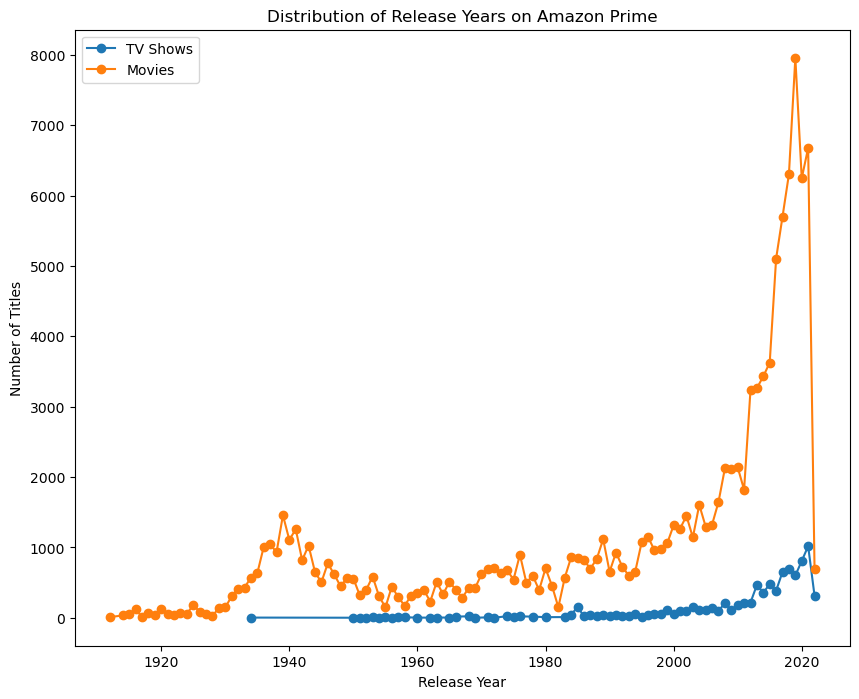

In [41]:

# Are there any trends or patterns in the release years of TV shows and movies available on Amazon Prime?

# Filter TV shows and movies separately
tv_shows = merged_movie_data[merged_movie_data['type'] == 'SHOW']
movies = merged_movie_data[merged_movie_data['type'] == 'MOVIE']

# Count the number of titles released in each year for TV shows
tv_show_counts = tv_shows['release_year'].value_counts().sort_index()

# Count the number of titles released in each year for movies
movie_counts = movies['release_year'].value_counts().sort_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the line chart for TV shows
ax.plot(tv_show_counts.index, tv_show_counts.values, marker='o', label='TV Shows')

# Plot the line chart for movies
ax.plot(movie_counts.index, movie_counts.values, marker='o', label='Movies')

# Set the labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.set_title('Distribution of Release Years on Amazon Prime')

# Add a legend
ax.legend()

# Save an image of the chart as a PNG file
plt.savefig("LineChart.png")

# Show the plot
plt.show()



Analysis: The analysis of the line chart reveals the distribution of release years for TV shows and movies available on Amazon Prime. The chart displays the number of titles released each year for both TV shows and movies.

This analysis highlights the trends and patterns in the release years of content on Amazon Prime. By examining the line chart, we can observe how the number of titles fluctuates over time for TV shows and movies, allowing us to identify notable spikes or declines in content releases.

The line chart provides a visual representation of the release year distribution, enabling us to understand the overall pattern and popularity of content across different time periods. It also helps us identify specific years or periods that experienced a higher concentration of releases.

In summary, this analysis offers valuable insights into Amazon Prime's content strategy and viewer preferences based on release years. It emphasizes the platform's commitment to offering a diverse range of movies and TV shows, as evident from the distribution of releases. Understanding the historical context of the content library through this analysis informs content acquisition decisions and showcases Amazon Prime's dedication to providing a comprehensive streaming experience for subscribers.

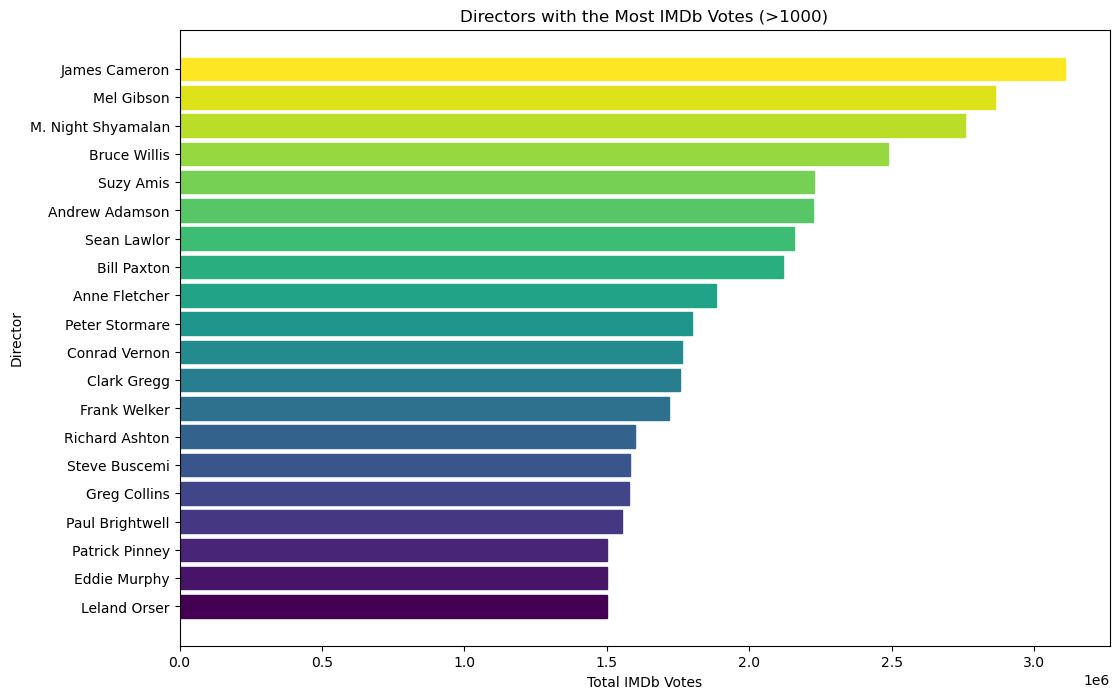

In [52]:
# Which directors have the highest total IMDb votes for their movies?
# considering only movies with more than 1000 IMDb votes.

# Filter movies from the merged dataset
movies = merged_movie_data[merged_movie_data['type'] == 'MOVIE']

# Filter movies with IMDb votes greater than 1000
highly_voted_movies = movies[movies['imdb_votes'] > 1000]

# Group movies by director and calculate the total IMDb votes for each director
director_votes = highly_voted_movies.groupby('name')['imdb_votes'].sum()

# Sort the directors based on their total IMDb votes in descending order
top_directors = director_votes.sort_values(ascending=False).head(20)

# Sort the directors in descending order
top_directors = top_directors.sort_values(ascending=True)

# Generate a range of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top_directors)))

# Plot the horizontal bar chart for top directors and their total IMDb votes
plt.figure(figsize=(12, 8))
bars = plt.barh(top_directors.index, top_directors.values.astype(int), color=colors)
plt.xlabel('Total IMDb Votes')
plt.ylabel('Director')
plt.title('Directors with the Most IMDb Votes (>1000)')

# Set the y-axis tick positions and labels
plt.yticks(range(len(top_directors.index)), top_directors.index)

# Assign different colors to each bar
for i, bar in enumerate(bars):
    bar.set_color(colors[i])

# Save an image of the chart as a PNG file
plt.savefig("BarChart.png")

# Display the plot
plt.show()



Analysis: The bar chart shows which directors have received the most IMDb votes for their movies. It focuses on movies with over 1000 IMDb votes. The x-axis represents the total number of IMDb votes, while the y-axis represents the directors. The chart helps us see which directors are the most popular among viewers based on the votes their movies have received.

This analysis offers valuable information for understanding audience preferences and identifying successful directors on Amazon Prime. It can guide content acquisition decisions by highlighting directors with a strong track record of audience appreciation.  By looking at the bar chart, we can easily compare the directors and see who has received the highest number of IMDb votes.  


By evaluating IMDb votes, this analysis enables data-driven decision-making and ensures the selection of high-quality content for subscribers. It enhances the platform's success by providing popular and well-received movies, ultimately contributing to customer satisfaction and engagement on Amazon Prime.

In [43]:
#Investigate differences in the genre distribution based on ratings on IMD
#Calculate the highest IMDB ratings
high_IMDB_ratings= titles_data_df[titles_data_df['imdb_score']>8]
high_IMDB_ratings

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424000,7.600000
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647000,8.000000
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435000,7.800000
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],tt0038650,8.6,444243.0,26.495000,8.300000
91,ts55748,What's My Line?,SHOW,Four panelists must determine guests' occupati...,1950,30,"['reality', 'family']",['US'],tt1036980,8.6,1563.0,87.392000,6.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,ts289376,Elzaz,SHOW,A young Wizard explores the highs and lows of ...,2021,20,"['comedy', 'fantasy']",No Data,tt13799306,8.9,10.0,6.910204,5.984247
9791,tm1022654,Lawyer Viswanath,MOVIE,Viswanath is a lawyer who is blessed with a lo...,2021,132,"['thriller', 'comedy', 'drama']",['IN'],tt14135136,8.3,588.0,0.644000,5.984247
9818,tm1023211,Kartha,MOVIE,Kartha is a Sandalwood action and drama movie ...,2021,155,['drama'],No Data,tt14142924,8.7,24.0,0.600000,5.984247
9862,tm1049635,Devineni,MOVIE,The film explores the life story of the famous...,2021,122,['drama'],No Data,tt14039792,8.4,1188.0,0.945000,5.984247


In [44]:
#Calculate the genre frequency of movies and tv shows
genre_counts_df=high_IMDB_ratings['genres'].str.split(',').str[0].value_counts()
genre_counts_df

['drama'             81
['documentation']    55
['documentation'     44
['comedy'            42
['drama']            38
['action'            25
['crime'             20
['comedy']           19
['scifi'             17
['thriller'          14
['animation'         11
['romance'           10
['reality'            9
['animation']         8
['war'                7
['music'              6
['reality']           6
['family'             6
['family']            5
[]                    5
['history'            4
['sport'              3
['music']             3
['western'            2
['horror'             2
['european'           1
['crime']             1
['fantasy'            1
['sport']             1
['action']            1
['romance']           1
['thriller']          1
Name: genres, dtype: int64

In [45]:
#calculate the total number of titles
total_titles=len(high_IMDB_ratings)
total_titles

449

In [46]:
#calculate the percentage of each genre of movies and tv shows
genre_percentage= genre_counts_df/total_titles*100
genre_percentage

['drama'             18.040089
['documentation']    12.249443
['documentation'      9.799555
['comedy'             9.354120
['drama']             8.463252
['action'             5.567929
['crime'              4.454343
['comedy']            4.231626
['scifi'              3.786192
['thriller'           3.118040
['animation'          2.449889
['romance'            2.227171
['reality'            2.004454
['animation']         1.781737
['war'                1.559020
['music'              1.336303
['reality']           1.336303
['family'             1.336303
['family']            1.113586
[]                    1.113586
['history'            0.890869
['sport'              0.668151
['music']             0.668151
['western'            0.445434
['horror'             0.445434
['european'           0.222717
['crime']             0.222717
['fantasy'            0.222717
['sport']             0.222717
['action']            0.222717
['romance']           0.222717
['thriller']          0.222717
Name: ge

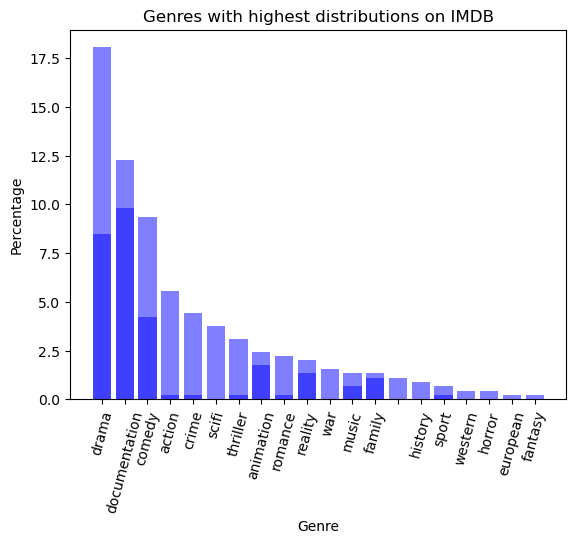

In [51]:
#Which genres have the highest distribution among titles with high IMDB ratings?
#Calculate the highest IMDB ratings
high_IMDB_ratings= titles_data_df[titles_data_df['imdb_score']>8]
high_IMDB_ratings

#Calculate the genre frequency of movies and tv shows
genre_counts_df=high_IMDB_ratings['genres'].str.split(',').str[0].value_counts()
genre_counts_df

#calculate the total number of titles
total_titles=len(high_IMDB_ratings)
total_titles

#calculate the percentage of each genre of movies and tv shows
genre_percentage= genre_counts_df/total_titles*100
genre_percentage

#Stacked bar chart illustrating the genre distribution for titles with high IMDB ratings.
#Graphic Data
genre=genre_percentage.index
percentage=genre_percentage.values
#Remove brackets from genre column
genre_clean=[genre.strip("[]''")for genre in genre]
#Create a Bar Chart
plt.bar(genre_clean, percentage, color='b', alpha=0.5,align="center")
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.title('Genres with highest distributions on IMDB')
plt.xticks(rotation=75)
# Save an image of the chart as a PNG file
plt.savefig("BARChart1.png")
plt.show()

Analysis:
After calculating the genres with the highest distribution on IMDB and the percentage of them, we can conclude from the above bar graph that the genres with the highest distribution and preferences of viewers are drama, documentation and comedy. In the same way we can conclude that the difference between these and the less distributed genres (horror, european, fantasy) is too noticeable, therefore amazon could focus on producing more shows with these genres without fear of losing a large amount of audience.

In [48]:
#Audience preferences on genres based on IMDB ratings
#Create IMDB DATA FRAME
IMDB_Movies_Shows=titles_data_df[['type','genres','imdb_votes']].copy()
IMDB_Movies_Shows['genres']=IMDB_Movies_Shows['genres'].str.split(',').str[0]
IMDB_Movies_Shows['genres'] = IMDB_Movies_Shows['genres'].str.strip("[]").str.strip("'")
IMDB_MOVIES_TVSHOWS=pd.DataFrame(IMDB_Movies_Shows)
IMDB_MOVIES_TVSHOWS


,type,genres,imdb_votes
0,SHOW,comedy,1092.000000
1,MOVIE,action,89766.000000
2,MOVIE,romance,63026.000000
3,MOVIE,comedy,57835.000000
4,MOVIE,thriller,30924.000000
...,...,...,...
9866,MOVIE,drama,20.000000
9867,MOVIE,comedy,8533.614253
9868,MOVIE,crime,8533.614253
9869,MOVIE,family,49.000000


In [49]:
#Top genres on IMDB
IMDB_top_genres = IMDB_MOVIES_TVSHOWS.groupby('genres')['imdb_votes'].mean().sort_values(ascending=False).head(10)
IMDB_top_genres

genres
scifi       24145.613888
fantasy     18762.186000
thriller    15241.891551
drama        9344.883695
romance      9171.017159
crime        8164.946094
action       7960.423365
comedy       6786.378382
             6396.525471
war          6291.119044
Name: imdb_votes, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

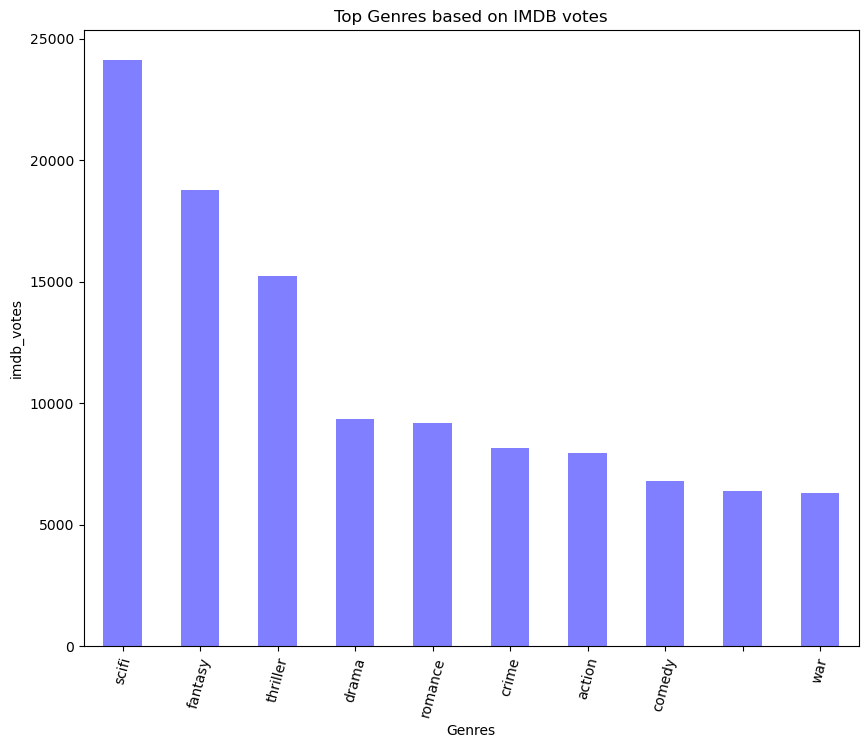

In [50]:
#Audience preferences on genres based on IMDB VOTES
#Create IMDB DATA FRAME
IMDB_Movies_Shows=titles_data_df[['type','genres','imdb_votes']].copy()
IMDB_Movies_Shows['genres']=IMDB_Movies_Shows['genres'].str.split(',').str[0]
IMDB_Movies_Shows['genres'] = IMDB_Movies_Shows['genres'].str.strip("[]").str.strip("'")
IMDB_MOVIES_TVSHOWS=pd.DataFrame(IMDB_Movies_Shows)
IMDB_MOVIES_TVSHOWS

#Top genres on IMDB
IMDB_top_genres = IMDB_MOVIES_TVSHOWS.groupby('genres')['imdb_votes'].mean().sort_values(ascending=False).head(10)
IMDB_top_genres

#Create Visualization
plt.figure(figsize=(10,8))
IMDB_top_genres.plot(kind='bar',color='b',alpha=0.5,align='center')
plt.title('Top Genres based on IMDB votes')
plt.xlabel('Genres')
plt.ylabel('imdb_votes')
plt.xticks(rotation=75)
# Save an image of the chart as a PNG file
plt.savefig("BarChart2.png")
plt.show

Analysis:
After analyzing the genres based on IMDB votes we can conclude the following:
The three most popular genres, based on IMDB votes are Sci-fi, fantasy and thriller, if we compare this with the results of the genres based on the IMDB score we will notice that there is not such a high distribution in Sci-fi, fantasy and thriller.Therefore the analysis concludes by suggesting the need for a distribution strategy for Sci-fi, fantasy, and thriller genres. This strategy could focus on promoting and distributing titles within these genres to reach a wider audience.